## Description
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather
  1: Clear, Few clouds, Partly cloudy, Partly cloudy
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기

In [2]:
data = pd.read_csv("train.csv")
data.shape

(10886, 12)

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


- datatime만 범주형, 나머지 변수는 실수/정수
- 행: 10886개, 컬럼 12개

In [5]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

null값 없음

In [6]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


- 범주형 변수: season, holiday, workingday, weather

# 2. data 확인하기

In [7]:
# casual + registered = count인가?
data['total'] = data['casual'] + data['registered']
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,total
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1


In [8]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,total
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,88


- casual + registered = total 임을 알 수 있음.

In [9]:
# holiday, workingday 정확히 분리하기

def holi_or_work(holiday, workingday):
    if holiday == 0:
        if workingday == 0:
            msg = '주말'
        else:
            msg = '평일'
    else:
        msg = '휴일'
    return msg

data['holi_or_work'] =list( map(lambda x, y: holi_or_work(x, y), data['holiday'], data['workingday']) )

In [10]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,total,holi_or_work
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,16,주말
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,40,주말
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,32,주말
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,13,주말
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,주말


In [11]:
holi_or_work =data['holi_or_work'].value_counts()
print(holi_or_work)

평일    7412
주말    3163
휴일     311
Name: holi_or_work, dtype: int64


In [13]:
sum(data['holi_or_work'].value_counts())

10886

- 휴일,주말, 평일로 나누어 분석해야 겠음. (겹치지 않도록)

# 3. 가설 설정 밀 검증

### 1) 가설 1
### 평일에는 등록한 사람들이 많이 이용하고, 주말/휴일에는 등록하지 않은 사람들이 많이 이용할 것이다

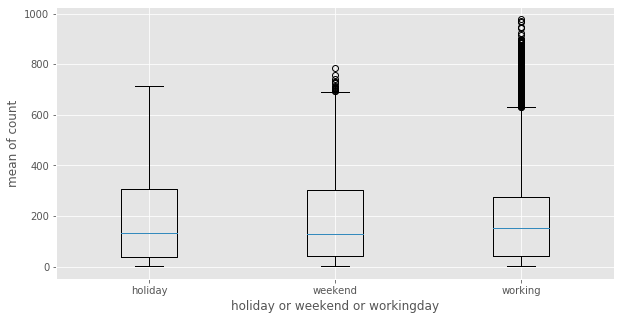

In [14]:
# 전체 이용자 수의 비교
s1 = data.loc[data['holi_or_work']== '휴일','count']
s2 = data.loc[data['holi_or_work']== '주말','count']
s3 = data.loc[data['holi_or_work']== '평일','count']

plt.figure(figsize = (10, 5))
plt.boxplot((s1,s2, s3))
plt.xlabel('holiday or weekend or workingday')
plt.ylabel('mean of count')
plt.xticks([1,2,3],('holiday','weekend','working'))
plt.show()

- 휴일, 주말, 평일의 전체 이용자 수는 비슷함.
- 휴일과 주말에 outlier가 많은 것은 날씨와 계절에 따른 영향일 것으로 생각됨

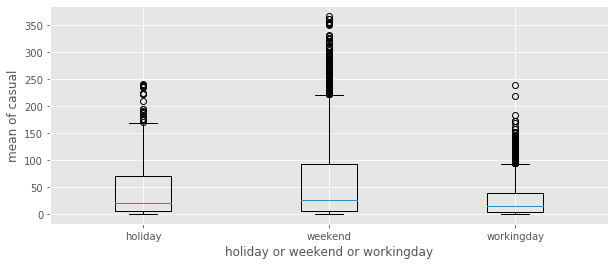

In [15]:
# 비등록자에 대한 비교
s1 = data.loc[data['holi_or_work'] == '주말', 'casual']
s2 = data.loc[data['holi_or_work'] == '휴일', 'casual']
s3 = data.loc[data['holi_or_work'] == '평일', 'casual']

plt.figure(figsize = (10, 4))
plt.boxplot((s2, s1, s3))
plt.xlabel('holiday or weekend or workingday')
plt.ylabel('mean of casual')
plt.xticks([1,2,3], ('holiday','weekend','workingday'))
plt.show()

- 비등록한 사람들은 주말 > 휴일> 평일 순으로 이용함.

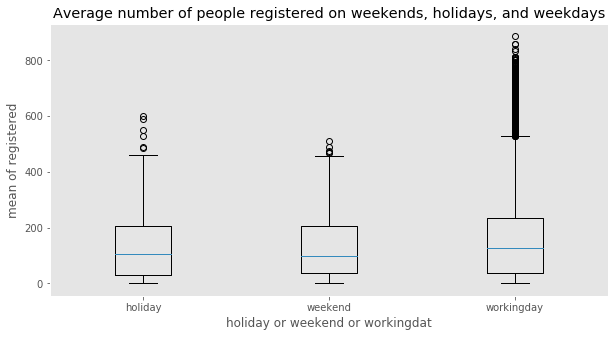

In [16]:
# 등록한 사람들에 대한 비교
s1 = data.loc[data['holi_or_work'] == '휴일', 'registered']
s2 = data.loc[data['holi_or_work'] == '주말', 'registered']
s3 = data.loc[data['holi_or_work'] == '평일', 'registered']

plt.figure(figsize = (10, 5))
plt.boxplot((s1, s2, s3))
plt.title('Average number of people registered on weekends, holidays, and weekdays')
plt.xlabel('holiday or weekend or workingdat')
plt.ylabel('mean of registered')
plt.xticks([1,2,3], ('holiday','weekend','workingday'))
plt.grid()
plt.show()

- 등록한 사람들은 평일> 휴일 = 주말로 나타남
- 예상대로 등록한 사람들은 평일에 많이 이용하고, 등록하지 않은 사람든 휴일/주말에 많이 이용하는 것을 볼 수 있음

## 2) 가설2
## 날씨가 좋은 봄, 가을에 사람들이 많이 공유 자전거를 이용할 것이다.

In [17]:
# datetime을 date, time으로 분리하기
data['date'] = data['datetime'].apply(lambda x: x.split()[0])
data['time'] = data['datetime'].apply(lambda x: x.split()[1])
data[['date','time']].head()

,date,time
0,2011-01-01,00:00:00
1,2011-01-01,01:00:00
2,2011-01-01,02:00:00
3,2011-01-01,03:00:00
4,2011-01-01,04:00:00


In [18]:
# 봄, 여름, 가을, 겨울 날짜 확인
data.loc[data['season'] == 1, 'date' ]  # 1.1 ~ 3.19
data.loc[data['season'] == 2, 'date'] # 4.1 ~ 9.19
data.loc[data['season'] == 3, 'date'] #  7.1~9.19
data.loc[data['season'] == 4, 'date'] # 10.1 ~ 12.19

4055     2011-10-01
4056     2011-10-01
4057     2011-10-01
4058     2011-10-01
4059     2011-10-01
4060     2011-10-01
4061     2011-10-01
4062     2011-10-01
4063     2011-10-01
4064     2011-10-01
4065     2011-10-01
4066     2011-10-01
4067     2011-10-01
4068     2011-10-01
4069     2011-10-01
4070     2011-10-01
4071     2011-10-01
4072     2011-10-01
4073     2011-10-01
4074     2011-10-01
4075     2011-10-01
4076     2011-10-01
4077     2011-10-01
4078     2011-10-01
4079     2011-10-02
4080     2011-10-02
4081     2011-10-02
4082     2011-10-02
4083     2011-10-02
4084     2011-10-02
            ...    
10856    2012-12-18
10857    2012-12-18
10858    2012-12-18
10859    2012-12-18
10860    2012-12-18
10861    2012-12-18
10862    2012-12-19
10863    2012-12-19
10864    2012-12-19
10865    2012-12-19
10866    2012-12-19
10867    2012-12-19
10868    2012-12-19
10869    2012-12-19
10870    2012-12-19
10871    2012-12-19
10872    2012-12-19
10873    2012-12-19
10874    2012-12-19


In [19]:
# 계절별, 날씨별 데이터 수 확인
data['season'].value_counts()  # 거의 비숫
data['weather'].value_counts()  # 1>2>3>4 순 ( 4( heavy snow/rain) : 데이터 수 1개)

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

C:\Python\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Python\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


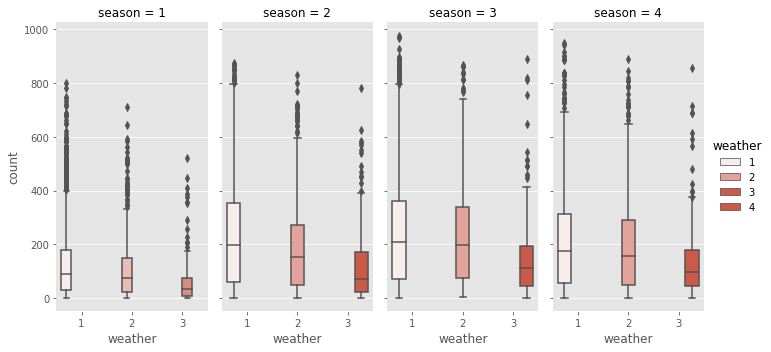

In [20]:
# 계절별 전체 이용자 수 plot 그리기
# data_season_weather =data[['seasno','weather','count']] 

g = sns.FacetGrid(data, col = 'season',height = 5, aspect = .5)
(g.map(sns.boxplot, 'weather', 'count', 'weather').despine(left = True).add_legend(title = 'weather'))
plt.show()

- 예상과 달리 봄보다는 여름, 가을 에 자전거를 많이 타는 것으로 나타남.
- 날씨가 4인 데이터는 1개 뿐이라, plot에는 표현되지 않음.
- 모든 계절에서 날씨가 좋을 때 많이 타는 것으로 나타남
- 워싱턴 DA의 계절별 기온, 습도, 바람 속도 등을 살펴보며 어떤 요소가 영향을 미치는지 알아봐야 겠음.

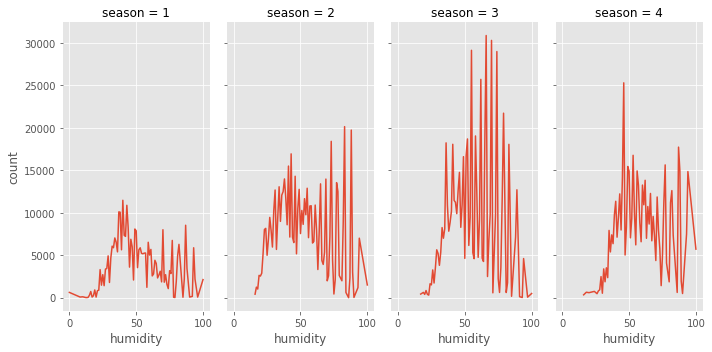

In [21]:
# 계절별 습도에 따른 전체 이용자 수의 함계
data_humidity = data.groupby(['season','humidity'], as_index = False)['count'].sum()

# plt.figure(figsize = (16, 8))
# plt.subplot(221)
# plt.plot(data_humidity[data_humidity.loc['season']==1, 'humidity'], 'name')
# plt.show()

g = sns.FacetGrid(data_humidity, col = 'season',height = 5, aspect = .5)
(g.map(sns.lineplot, 'humidity', 'count').despine(left = True))
plt.show()

- 습도가 극단적으로 낮을 때와 높을 때를 제외하고는 자전거를 많이 타고 있으며, 상관관계를 파악하기 어려움
- 날씨를 기준으로 plot을 그렸을 때와는 달리 가을에 가장 많이 타는 것으로 보임. plot을 잘못 그린 그린 것인지 살펴봐야겠음.

C:\Python\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


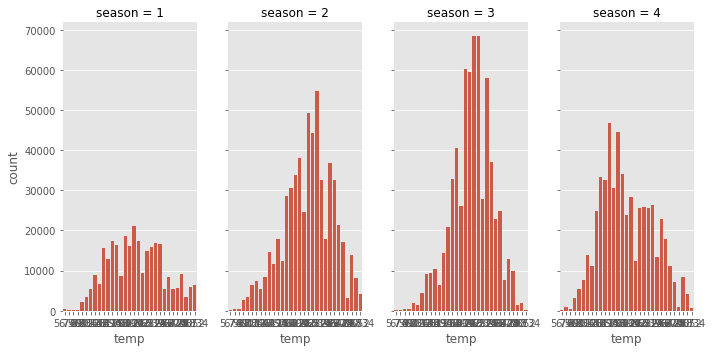

In [23]:
# 계절별 기온에 따른 전체 이용자 수의 함계
data_temp = data.groupby(['season','temp'], as_index = False)['count'].sum()

g = sns.FacetGrid(data_temp, col = 'season',height = 5, aspect = .5)
(g.map(sns.barplot, 'temp', 'count').despine(left = True))
plt.show()

- 계절에 따른 온도는 봄, 가을에 많이 타는 것 같음.
- 여름, 가을의 이용율(plot의 면적)이 거의 비슷할 것을 보임

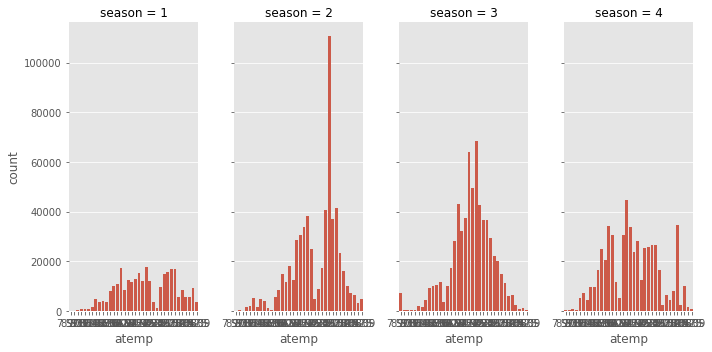

In [24]:
# 계절별 체감온도에 따른 전체 이용자 수의 함계
data_temp = data.groupby(['season','atemp'], as_index = False)['count'].sum()

g = sns.FacetGrid(data_temp, col = 'season',height = 5, aspect = .5)
(g.map(sns.barplot, 'atemp', 'count').despine(left = True))
plt.show()

- 체감 온도에 따른 계절별 변화는 위의 그래프에서 살펴본 것과 같이 여름, 가을에 많이 타지만, 여름에 체감기온 32때 특히 많이 자전거를 이용하는 것을 볼 수 있었음.
- 체감기온 32도에 영향을 미치는 요인에 대해 좀 더 분석할 필요가 있음.


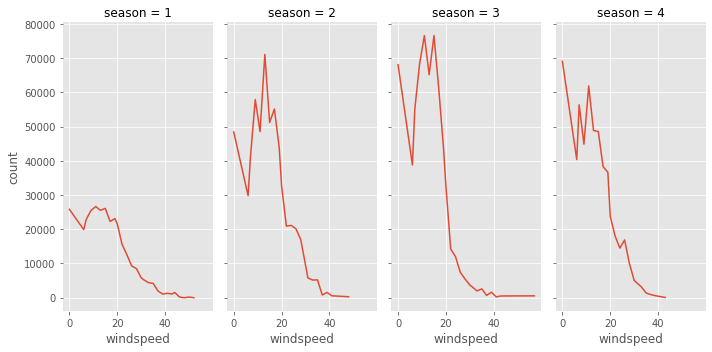

In [25]:
# 계절별 바람 속도에 따른 전체 이용자 수의 함계
data_temp = data.groupby(['season','windspeed'], as_index = False)['count'].sum()

g = sns.FacetGrid(data_temp, col = 'season',height = 5, aspect = .5)
(g.map(sns.lineplot, 'windspeed', 'count').despine(left = True))
plt.show()

- 바람의 속도와 이용자수의 관계가 음의 상관관계를 보이나, 4계적 모두 처음에는 높았다가 낮아졌다가 다시 높아지고 낮아지는 양상을 보임.
- 어떤 원인이 있는지 분석하면 좋을 것 같음

# 3) 가설3
## 출퇴근 시간에는 등록한 사람들이 많이 이용할 것이다.

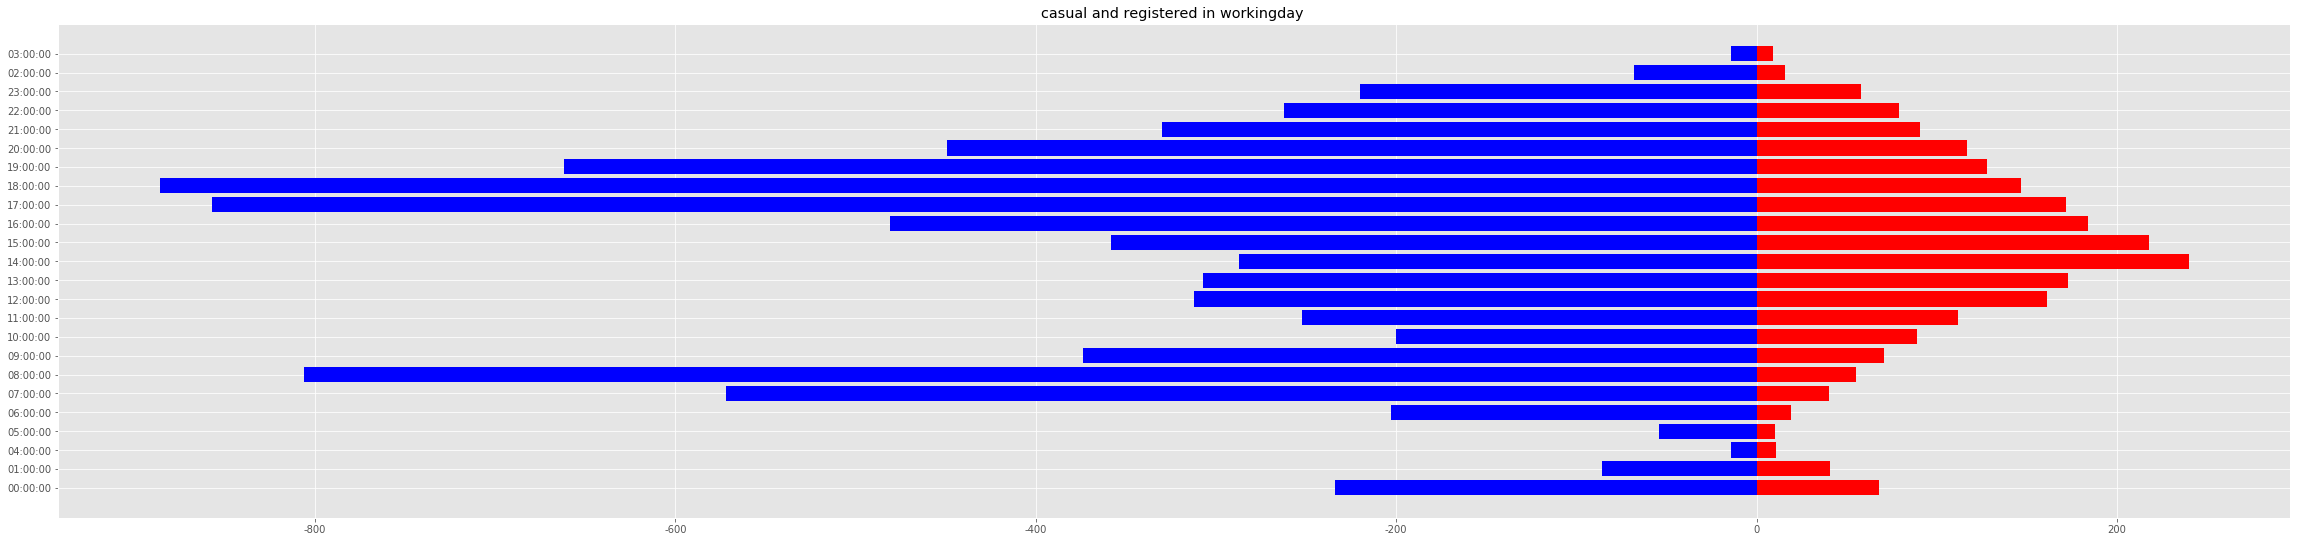

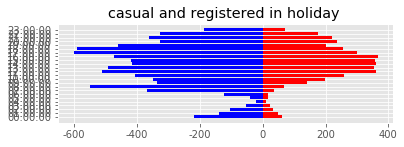

In [26]:
data_workingday = data[data['workingday']==1]
data_holiday = data[data['workingday']==0]

plt.figure(figsize = (40,20))
# 평일 
plt.subplot(211)
plt.barh(data_workingday['time'], data_workingday['casual'], label = 'casual', color = 'r')
plt.barh(data_workingday['time'], -data_workingday['registered'], label = 'registered', color = 'b')
plt.title("casual and registered in workingday ")
plt.show()

#휴일
plt.subplot(212)
plt.barh(data_holiday['time'], data_holiday['casual'], label = 'casual', color = 'r')
plt.barh(data_holiday['time'], -data_holiday['registered'], label = 'registered', color = 'b')
plt.title("casual and registered in holiday ")
plt.show()

- 등록하지 않은 사람들은 평일, 휴일모두 출퇴근 시간보다는 낮시간에 많이 이용함.
- 등록한 사람들은 평일에는 출퇴근 시간에, 휴일에는 낮시간에 많이 이용함.


## 4. 분석 결과 및 활용
   공유 자전거 서비스 개선1

- 평일 출퇴근 시간에 많이 이용하는 등록된 사람들의 비중이 높음.
- 데이터를 추가로 수집한다면, 그들의 빌린 대여소와 반납한 대여소에 일정한 패턴이 있을 것으로 판단됨.
- 대여소 위치 정보와 시간 정보를 활용하여, 자전거를 공급하여, 자전거를 이용하고자 할 때 자전거의 부재로 이용이 못하는 일이 없도록 서비스를 개선하면 좋을 것 같음.


   공유 자전거 서비스 개선2

- 평소 패턴과는 다르게 자전거를 대여, 반남하는 경우, 시간, 위치 정보를 활용하여 고장난 자전거 여부를 파악하고 신속하게 수리를 진행함.
- 대여 후 1분 이내 반납하거나, 근처 대여소에서 자전거를 교체한 경우 등에 대한 데이터 수집이 필요함.

    공유 자전거 서비스 개선3

-  주말, 휴일에 낮시간 동안에 비등록한 사람들이 많이 이용함.
- 주말, 휴일에 이용하는 비등록한 이용자가 많이 찾는 위치(공원, 자전거 전용도로 등)를 파악하여, 낮 시간동안에만 이용할 수 있는 정기권 제도를 저렴하게 만들어 판매한다면, 등록하게 되고, 지속적인 이용이 가능하도록 만들 수 있을 것으로 판단됨.

# 5. 모델링
## 수업 시간에 보완

In [28]:
df_train = pd.read_csv('train.csv', parse_dates=['datetime'])
df_test = pd.read_csv('test.csv', parse_dates=['datetime'])
df_submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])

In [29]:
df_train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


- 주의: season 1~4까지 봄, 여름, 가을, 겨울로 되어있지만 실제 데이터를 보면 1~3월을 봄으로 구분해놓았음. 따라서 봄, 여름, 가을, 겨울보다는 1분기, 2분기, 3분기, 4분기로 구분하는 게 올바름.

In [31]:
df_test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [32]:
df_submission.head(3)

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0


In [33]:
print(df_train.shape, df_test.shape)
print("훈련 데이터")
print(df_train.dtypes)
print("테스트 데이터")
print(df_test.dtypes)

(10886, 12) (6493, 9)
훈련 데이터
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object
테스트 데이터
datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object


## 중복 체크
훈련 데이터, 테스트 데이터에 중복 값이 없음

In [34]:
sum(df_train.duplicated()), sum(df_test.duplicated())

(0, 0)

## Null 체크
훈련 데이터, 테스트 데이터에 null 값이 없음

In [35]:
df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [36]:
df_test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

## datetime을 세부적으로 나누기
datetime에서 년, 월, 일, 시간, 분, 초를 추출하여 각각 column으로 만들어 주기

In [37]:
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['hour'] = df_train['datetime'].dt.hour
df_train['minute'] = df_train['datetime'].dt.minute
df_train['second'] = df_train['datetime'].dt.second

In [38]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


# 시각화
년, 월, 일, 시간, 분, 초에 따른 대여량 평균치

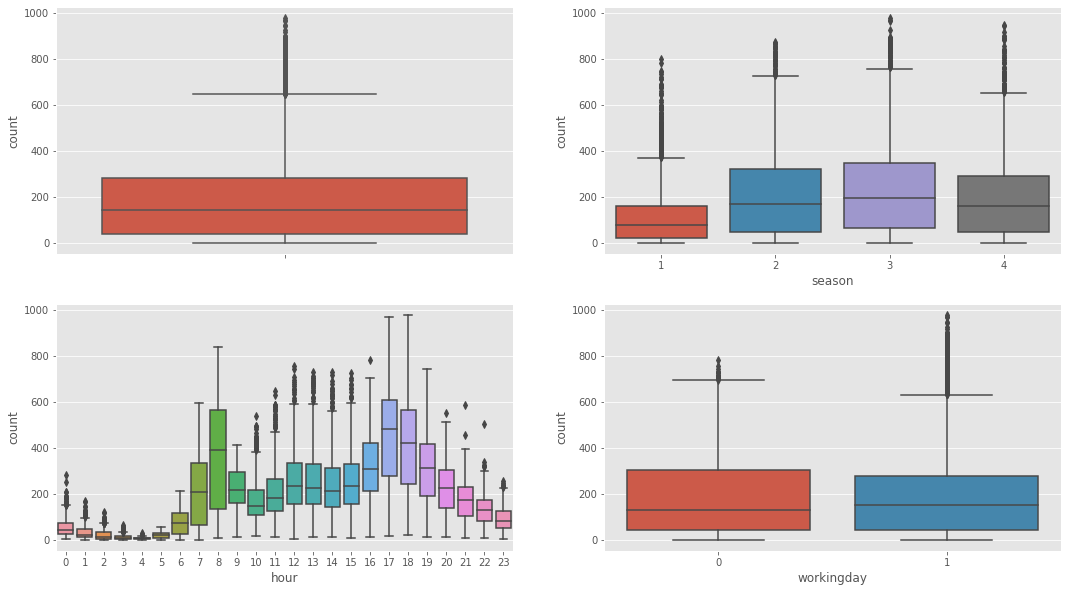

In [39]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18, 10)

sns.boxplot(data=df_train, y='count', ax=ax1)
sns.boxplot(data=df_train, x='season', y='count', ax=ax2)
sns.boxplot(data=df_train, x='hour', y='count', ax=ax3)
sns.boxplot(data=df_train, x='workingday', y='count', ax=ax4)

- season1~4가 봄, 여름, 가을, 겨울이 아니라 1~3월, 4~6월, 7~9월, 10~12월임. 따라서 봄, 여름, 가을, 겨울보다는 1사분기, 2사분기, 3사분기, 4사부기로 보는 게 맞음. season별로는 3사분기에 가장 많은 대여량을 기록함.
- 시간대별로는 위에서 봤던 것처럼 출퇴근 시간이 가장 많음.

## datetime을 기반으로 요일 추출

In [40]:
# The day of week with Monday=0, Sunday=6
df_train['dayofweek'] = df_train['datetime'].dt.dayofweek
df_train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5


In [42]:
df_train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

- 당연한 말이지만 월,화,수,목,금,토,일 거의 비슷하게 분포되어 있음

## 시간대별 자전거 대여량 (by 근무일 유무, 요일, 시즌, 날씨)

ValueError: Invalid RGBA argument: masked

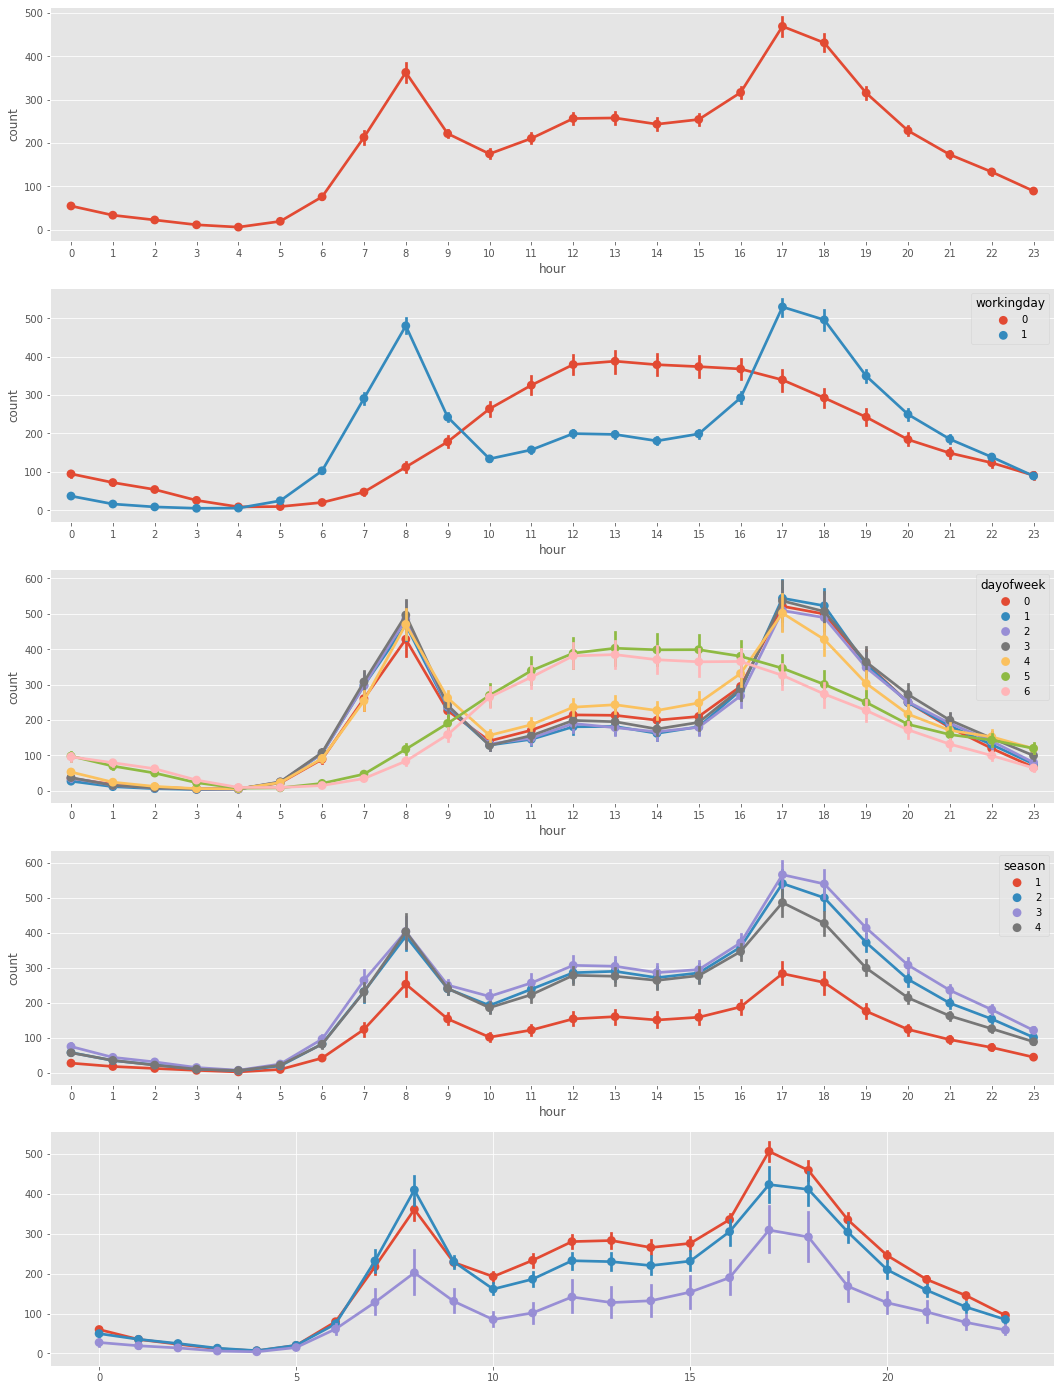

In [43]:
fig,(ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=df_train, x='hour', y='count', ax=ax1)
sns.pointplot(data=df_train, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=df_train, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=df_train, x='hour', y='count', hue='season', ax=ax4)
sns.pointplot(data=df_train, x='hour', y='count', hue='weather', ax=ax5);

- 전체적으로 볼 때 출퇴근 시간에 자전거 대여량이 많음
- 근무일과 휴무일로 나누어보면 근무일에는 출퇴근 시간에 대여랑이 많고, 휴무일에는 낮시간에 대여량이 많음
- 요일로 나누어보면 월~금은 출퇴근 시간에 대여량이 많고, 토,일은 낮시간에 대여량이 많음
- 시즌별로 보면 1~3월에 대여량이 가장 적고, 7~9월에 대여량이 가장 많음
- 날씨별로 보면 날씨가 좋을 수록 대여량이 많고, 비가 많이 올 때는 대여량의 거의 없음

## faeture간 상관관계

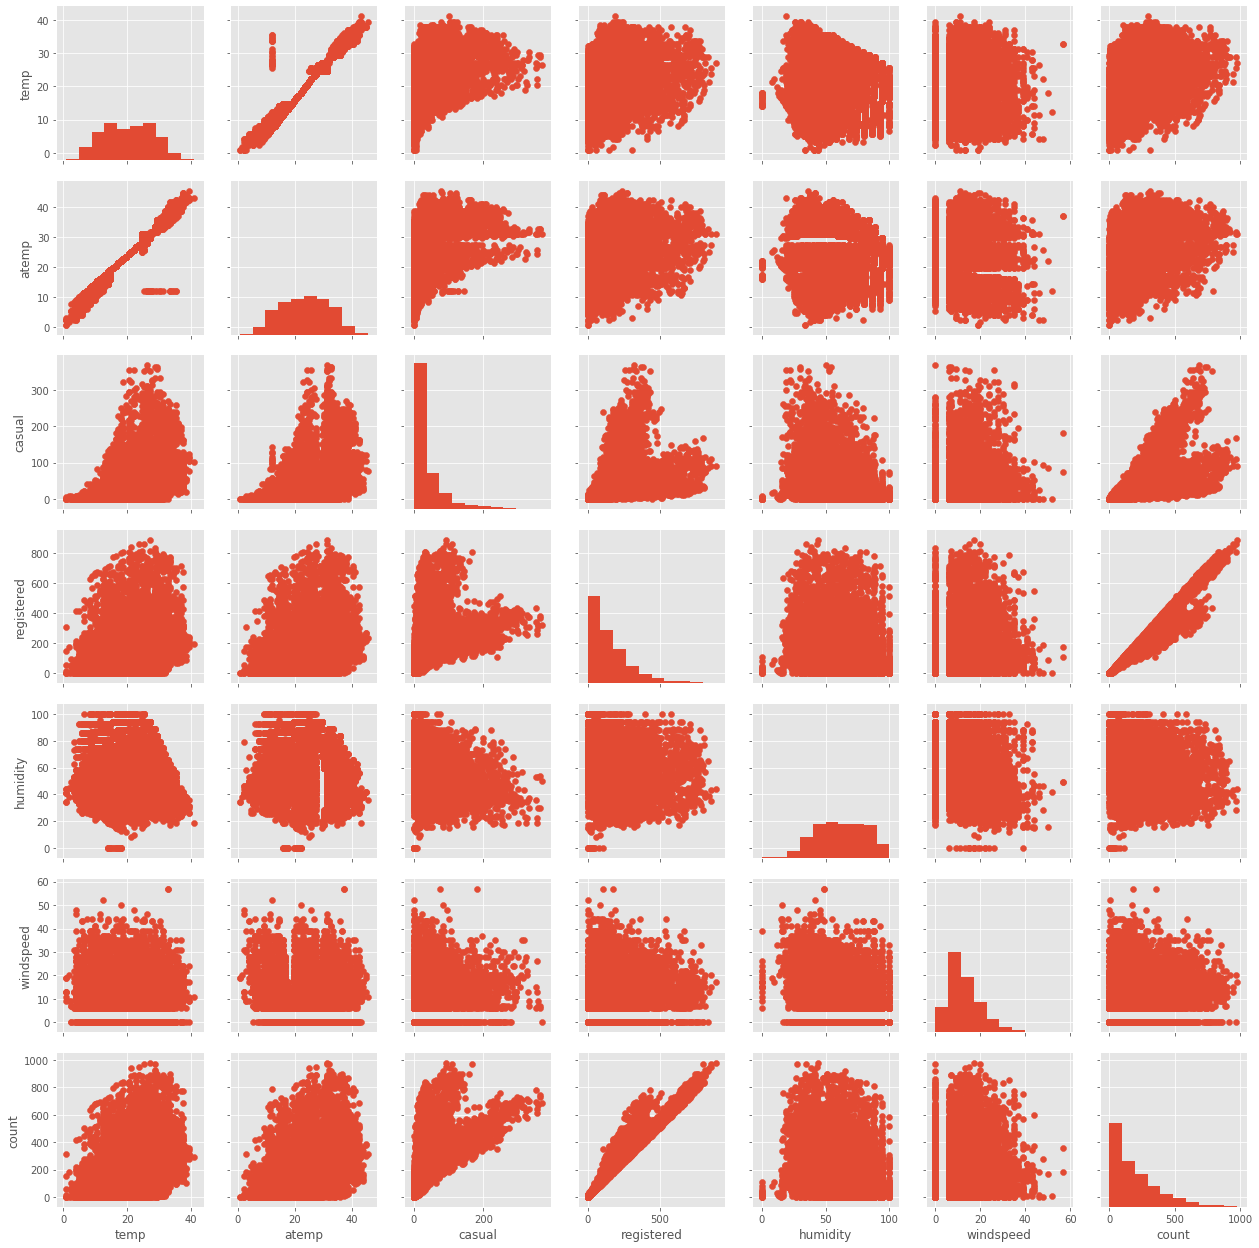

In [44]:
g = sns.PairGrid(data=df_train, vars=['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [45]:
corr_matrix = df_train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corr_matrix = corr_matrix.corr()
corr_matrix

,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.984948,0.467097,0.318571,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,0.462067,0.314635,-0.043536,-0.057473,0.389784
casual,0.467097,0.462067,1.000000,0.497250,-0.348187,0.092276,0.690414
registered,0.318571,0.314635,0.497250,1.000000,-0.265458,0.091052,0.970948
humidity,-0.064949,-0.043536,-0.348187,-0.265458,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,0.092276,0.091052,-0.318607,1.000000,0.101369
count,0.394454,0.389784,0.690414,0.970948,-0.317371,0.101369,1.000000


In [46]:
mask = np.array(corr_matrix)
print(mask)
print(np.tril_indices_from(mask))
mask[np.tril_indices_from(mask)] = False
mask

[[ 1.          0.98494811  0.46709706  0.31857128 -0.06494877 -0.01785201
   0.39445364]
 [ 0.98494811  1.          0.46206654  0.31463539 -0.04353571 -0.057473
   0.38978444]
 [ 0.46709706  0.46206654  1.          0.49724969 -0.3481869   0.09227619
   0.69041357]
 [ 0.31857128  0.31463539  0.49724969  1.         -0.26545787  0.09105166
   0.97094811]
 [-0.06494877 -0.04353571 -0.3481869  -0.26545787  1.         -0.31860699
  -0.31737148]
 [-0.01785201 -0.057473    0.09227619  0.09105166 -0.31860699  1.
   0.10136947]
 [ 0.39445364  0.38978444  0.69041357  0.97094811 -0.31737148  0.10136947
   1.        ]]
(array([0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6], dtype=int64), array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0,
       1, 2, 3, 4, 5, 6], dtype=int64))


array([[ 0.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.        ,  0.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.        ,  0.        ,  0.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.26545787,
         0.09105166,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.31860699, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

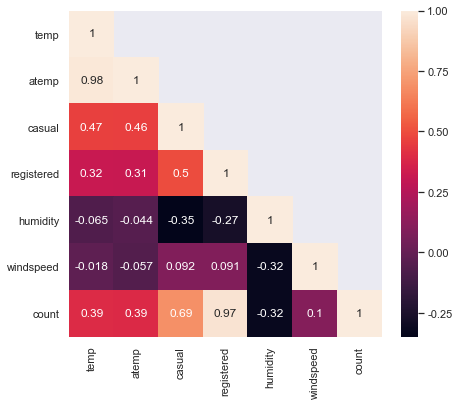

In [47]:
sns.set(rc={'figure.figsize':(7,6)})
sns.heatmap(corr_matrix, mask=mask, annot=True);

- 온도, 습도, 풍속은 상관관계가 거의 없음
- 대여량과 가장 상관관계가 높은 것은 registered지만 테스트 데이터에는 없으므로 사용할 수 없음
- 온도와 체감온도는 당연히 상관관계가 높지만 큰 의미가 있지는 않음

## 기온, 풍속, 습도 시각화

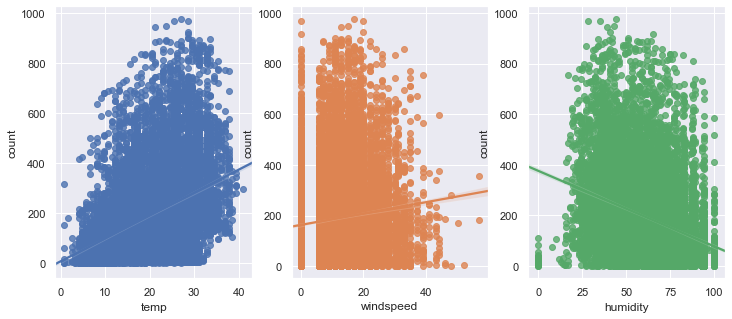

In [48]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=df_train,ax=ax1)
sns.regplot(x="windspeed", y="count", data=df_train,ax=ax2)
sns.regplot(x="humidity", y="count", data=df_train,ax=ax3);

풍속이 0인 데이터가 많은 것은 관측치가 없기 때문인 것으로 사료됨

## 연도별, 월별 자전거 대여량

In [49]:
def concat_year_month(datetime):
    return '{0}-{1}'.format(datetime.year, datetime.month)

df_train['year_month'] = df_train['datetime'].apply(concat_year_month)

df_train[['datetime', 'year_month']].head()

,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


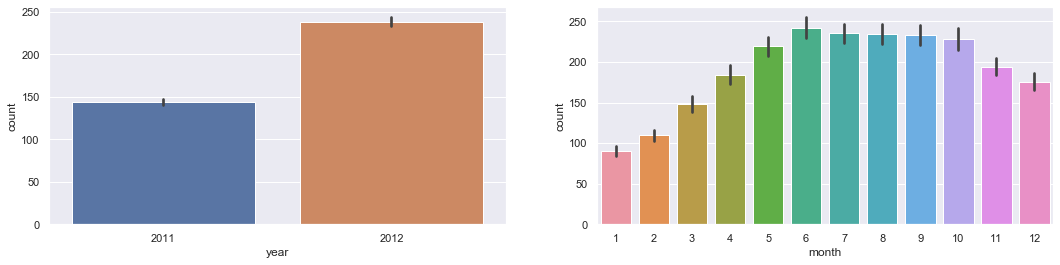

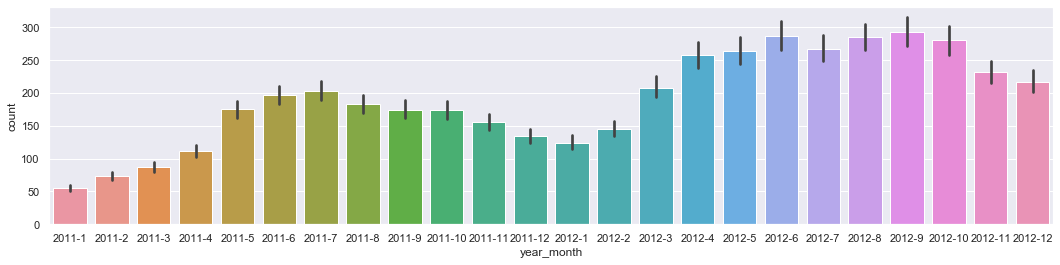

In [50]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)
sns.barplot(data=df_train, x='year', y='count', ax=ax1)
sns.barplot(data=df_train, x='month', y='count', ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)
sns.barplot(data=df_train, x='year_month', y='count', ax=ax3);

- 2011년보다 2012년의 대여량이 더 많음
- 주로 여름철 대여량이 많고, 그중 6월이 가장 많음
- 2011년과 2012년의 월별 대여량 양상은 비슷하나 2012년에 대여량이 더 많음

In [51]:
## 3시그마 초과하는 아웃라이어 제거

In [52]:
df_train_without_outliers = df_train[df_train['count'] - df_train['count'].mean() < 3*df_train['count'].std()]

print(df_train.shape)
print(df_train_without_outliers.shape)

(10886, 20)
(10739, 20)


In [53]:
## 대여량 로그화

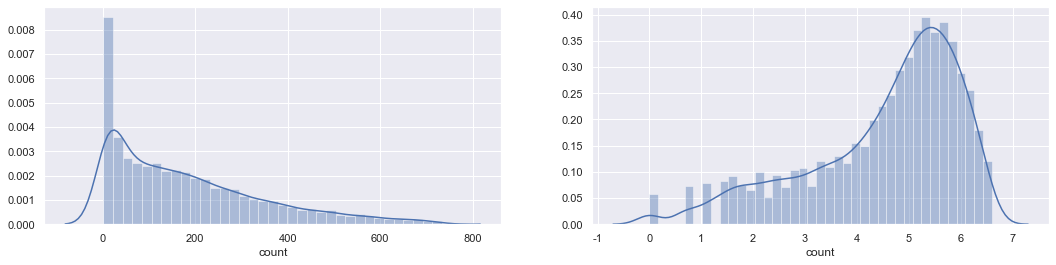

In [54]:
figure, axes = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)

sns.distplot(df_train_without_outliers['count'], ax=axes[0]);
sns.distplot(np.log(df_train_without_outliers['count']), ax=axes[1]);

종속 변수가 정규분포를 따르면 분석이 용이함, 따라서 로그화를 취해주었음, 완벽한 정규분포는 아니지만 보다 정규분포에 가까워짐

In [55]:
df_train.shape, df_test.shape

((10886, 20), (6493, 9))

In [61]:
df_train["year"] = df_train["datetime"].dt.year
df_train["month"] = df_train["datetime"].dt.month
df_train["day"] = df_train["datetime"].dt.day
df_train["hour"] = df_train["datetime"].dt.hour
df_train["minute"] = df_train["datetime"].dt.minute
df_train["second"] = df_train["datetime"].dt.second
df_train["dayofweek"] = df_train["datetime"].dt.dayofweek

In [62]:
df_test["year"] = df_test["datetime"].dt.year
df_test["month"] = df_test["datetime"].dt.month
df_test["day"] = df_test["datetime"].dt.day
df_test["hour"] = df_test["datetime"].dt.hour
df_test["minute"] = df_test["datetime"].dt.minute
df_test["second"] = df_test["datetime"].dt.second
df_test["dayofweek"] = df_test["datetime"].dt.dayofweek

## 풍속이 0인 데이터 채우기
풍속이 0인 데이터는 실제 풍속이 0인 게 아니라 기록이 되지 않아 0으로 채웠을 것임. 따라서 해당 데이터를 적절한 값으로 채워주어야 함. null 값을 채우는 가장 일반적으로 방법은 평균값을 넣어주는 것임. 하지만 예측의 정확도를 위해 머신러닝으로 예측해서 풍속을 넣어주도록 하겠음

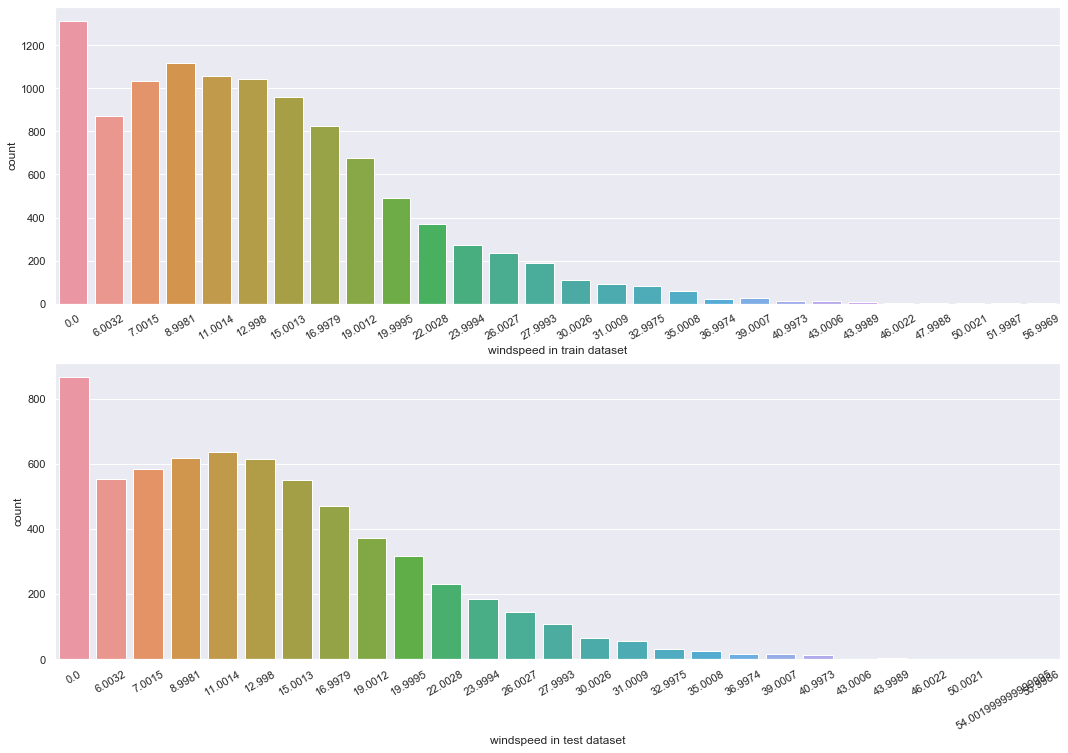

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(18, 12)

plt.sca(axes[0])
plt.xticks(rotation=30)
sns.countplot(data=df_train, x='windspeed', ax=axes[0])
axes[0].set(xlabel='windspeed in train dataset')

plt.sca(axes[1])
plt.xticks(rotation=30)
sns.countplot(data=df_test, x='windspeed', ax=axes[1])
axes[1].set(xlabel='windspeed in test dataset');

In [57]:
from sklearn.ensemble import RandomForestClassifier

def get_df_with_predicted_windspeed(df_train):  
    
    # windspeed가 0인 df와 0이 아닌 df로 나누기
    df_train_wind_zero = df_train.loc[df_train['windspeed']==0]
    df_train_wind_not_zero = df_train.loc[df_train['windspeed']!=0]

    # 풍속을 예측할 피처를 선택한다.
    wind_train_features = ["season", "weather", "humidity", "month", "temp", "year", "atemp"]

    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    df_train_wind_not_zero["windspeed"] = df_train_wind_not_zero["windspeed"].astype("str")

    # 랜덤포레스트 분류기를 사용한다.
    wind_classifier = RandomForestClassifier()

    # windspeed_train_features에 있는 피처 값을 바탕으로 풍속을 학습시킨다.
    wind_classifier.fit(df_train_wind_not_zero[wind_train_features], df_train_wind_not_zero["windspeed"])

    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측한다.
    wind_prediction = wind_classifier.predict(X = df_train_wind_zero[wind_train_features])

    # 값을 다 예측 후 비교해 보기 위해 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predict_wind_zero = df_train_wind_zero
    predict_wind_not_zero = df_train_wind_not_zero

    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predict_wind_zero["windspeed"] = wind_prediction

    # 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    df_train = predict_wind_not_zero.append(predict_wind_zero)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    df_train["windspeed"] = df_train["windspeed"].astype("float")

    df_train.reset_index(inplace=True)
    df_train.drop('index', inplace=True, axis=1)
    
    return df_train

In [58]:
# windspeed 0 값에 대한 feature engineering
df_train = get_df_with_predicted_windspeed(df_train)

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Python\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


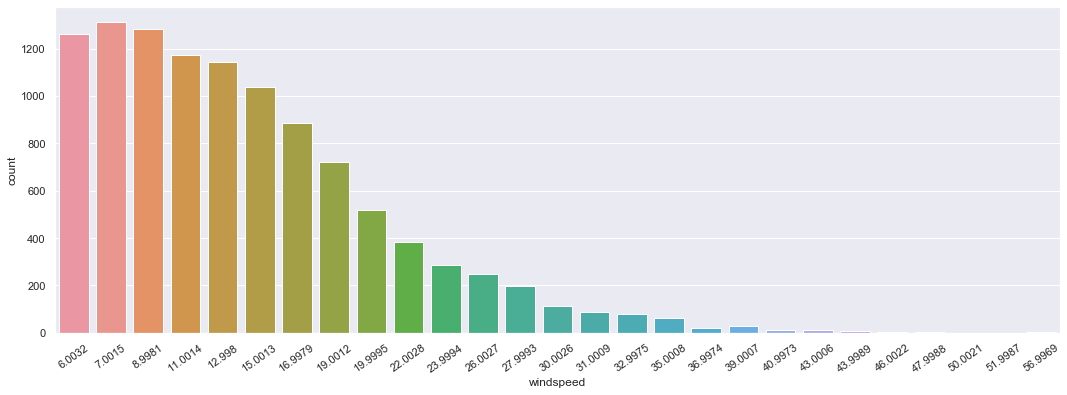

In [59]:
sns.set(rc={'figure.figsize':(18,6)})
plt.xticks(rotation=35)
sns.countplot(data=df_train, x='windspeed');

## Feature Selection
feature가 너무 많으면 오버피팅, 너무 적으면 언더피팅이 됨. 따라서 성능이 좋은 feature를 잘 선택해주어야 함

## 범주형 Feature type 변경

In [63]:
# day, minute, second는 training feature로 적절하지 않으므로 제외함
categorical_feature = ['season', 'holiday', 'workingday', 'weather',
                       'dayofweek', 'year', 'month', 'hour']
for feature in categorical_feature:
    df_train[feature] = df_train[feature].astype('category')
    df_test[feature] = df_test[feature].astype('category')

In [64]:
feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [65]:
X_train = df_train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [66]:
X_test = df_test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [67]:

label_name = "count"

y_train = df_train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

# Score
## RMSLE
과대평가 된 항목보다는 과소평가 된 항목에 패널티를 준다.

오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root) 으로 값이 작을 수록 정밀도가 높다.

0에 가까운 값이 나올 수록 정밀도가 높은 값이다.

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE)

정답에 대한 오류를 숫자로 나타낸 값으로 값이 클 수록 오차가 크다는 의미다. 값이 작을 수록 오류가 적다는 의미를 나타낸다.

In [69]:
from sklearn.metrics import make_scorer

def RMSLE(predicted_values, actual_values):
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

RMSLE_scorer = make_scorer(RMSLE)
RMSLE_scorer

make_scorer(RMSLE)

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K_fold generator 만들기
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [71]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                             n_jobs=-1,
                             random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [72]:

%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=RMSLE_scorer)
score = score.mean()
# 0과 가까울 수록 좋은 데이터
print("Score = {0:.5f}".format(score))

Wall time: 35.2 s
Score = 0.33139


In [73]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [74]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 12.19,   4.91,   4.16,   3.46,   3.12,   6.89,  38.45, 105.65,
       236.5 , 135.6 ])

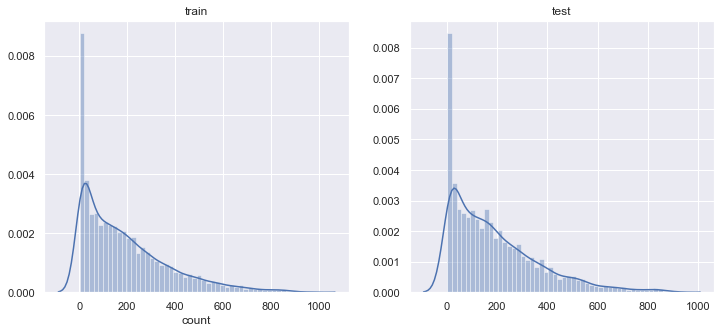

In [75]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test");

In [78]:
submission = pd.read_csv("sampleSubmission.csv")

submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.19
1,2011-01-20 01:00:00,4.91
2,2011-01-20 02:00:00,4.16
3,2011-01-20 03:00:00,3.46
4,2011-01-20 04:00:00,3.12


In [79]:
submission.to_csv("Score_{0:.5f}_submission.csv".format(score), index=False)

## Linear Regression Model (선형회귀모델)
- 선형회귀 또는 최소제곱법은 가장 간단하고 오래된 회귀용 선형 알고리즘
- 선형회귀는 예측과 훈련 세트에 있는 타깃 y사이의 평균제곱오차(MSE)를 최소화하는 파라미터 w와 b를 찾는다.
- 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 수 없다는 단점이 있다.

In [80]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=DeprecationWarning)

# 선형회귀 모델을 초기화
linear_model = LinearRegression()

# 모델 학습
y_train_log = np.log1p(y_train)
linear_model.fit(X_train, y_train_log)

# 예측하고 정확도를 평가한다.
preds = linear_model.predict(X_train)
print("RMSLE Value for linear regression: ",
     RMSLE(np.exp(y_train_log), np.exp(preds)))

RMSLE Value for linear regression:  0.9797608627718319


## Regularization Model - Ridge (릿지 모델)
- 회귀를 위한 선형모델
- 가중치(w)의 모든 원소가 0에 가깝게 만들어 모든 피처가 주는 영향을 최소화(기울기를 작게 만듦)
- Regularization(정규화)는 오버피팅(과대적합)이 되지 않도록 모델을 강제로 제한한다는 의미
- max_iter(반복 실행하는 최대 횟수)는 3000을 넣어주었다.

In [81]:
ridge_model = Ridge()
ridge_params_ = {'max_iter':[3000],
                 'alpha':[0.01, 0.1, 1, 2, 3, 4, 10,
                          30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(RMSLE, greater_is_better=False)
grid_ridge_model = GridSearchCV(ridge_model,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train_log = np.log1p(y_train)
grid_ridge_model.fit(X_train, y_train_log)
preds = grid_ridge_model.predict(X_train)
print (grid_ridge_model.best_params_)
print ("RMSLE Value For Ridge Regression: ", 
       RMSLE(np.exp(y_train_log),np.exp(preds)))

{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9797608607490835


## Regularization Model - Lasso (라쏘 모델)

In [82]:

lasso_model = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = {'max_iter':[3000], 'alpha':alpha}

grid_lasso_model = GridSearchCV(lasso_model,
                          lasso_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train_log = np.log1p(y_train)
grid_lasso_model.fit(X_train, y_train_log)
preds = grid_lasso_model.predict(X_train)
print (grid_lasso_model.best_params_)
print ("RMSLE Value For Lasso Regression: ", 
       RMSLE(np.exp(y_train_log),np.exp(preds)))

{'alpha': 0.00125, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9797705678337936


## Ensemble Model - Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor
randomforest_model = RandomForestRegressor(n_estimators=100)

y_train_log = np.log1p(y_train)
randomforest_model.fit(X_train, y_train_log)

preds = randomforest_model.predict(X_train)
score_rf = RMSLE(np.exp(y_train_log),np.exp(preds))

print ("RMSLE Value For Random Forest: ", score_rf)

RMSLE Value For Random Forest:  0.1062924506896128


In [84]:
## Ensemble Model - Gradient Boost

- 여러 개의 결정트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 기법
- 회귀와 분류에 모두 사용할 수 있음
- 랜덤포레스트와 달리 이진 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
- 무작위성이 없고 강력한 사전 가지치기가 사용 됨
- 1~5개의 깊지 않은 트리를 사용하기 때문에 메모리를 적게 사용하고 예측이 빠름
- learning_rate : 오차를 얼마나 강하게 보정할 것인지를 제어
- n_estimator의 값을 키우면 앙상블에 트리가 더 많이 추가 되어 모델의 복잡도가 커지고 훈련세트에서의 실수를 바로잡을 기회가 많아지지만 너무 크면 모델이 복잡해지고 오버피팅(과대적합)이 될 수있다.
- max_depth(max_leaf_nodes) 복잡도를 너무 높이지 말고 트리의 깊이가 5보다 깊어지지 않게 한다.

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)
score = RMSLE(np.exp(y_train_log),np.exp(preds))
print ("RMSLE Value For Gradient Boost: ", score)

RMSLE Value For Gradient Boost:  0.20442511556204998


선형회귀, 릿지, 라쏘, 랜덤포레스트, 그레디언트 부스팅 중 RMSLE가 가장 작은 모델은 랜덤포레스트임

In [87]:
submission1 = pd.read_csv("sampleSubmission.csv")
submission1

preds_test = randomforest_model.predict(X_test)

submission1["count"] = np.exp(preds_test)

print(submission1.shape)
submission1.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.864236
1,2011-01-20 01:00:00,6.062768
2,2011-01-20 02:00:00,4.130102
3,2011-01-20 03:00:00,3.998767
4,2011-01-20 04:00:00,3.779282


In [88]:
submission.to_csv("Score_{0:.5f}_submission1.csv".format(score_rf), index=False)